Business Forecasting using Python


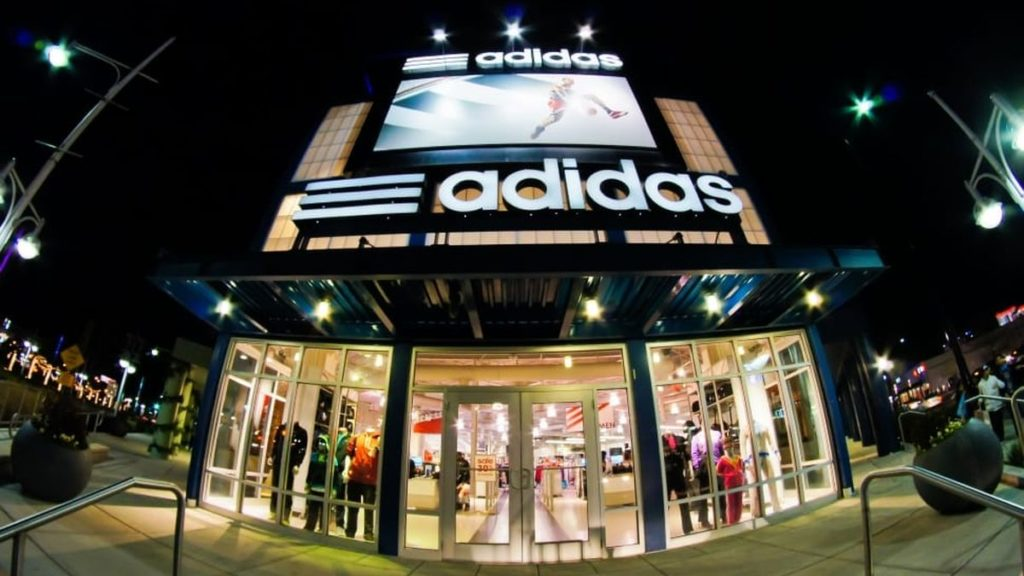


İş Tahmini, Zaman Serisi Tahmininin uygulamalarından biridir. İş Tahmininde, işletme tarafından oluşturulan geçmiş Zaman Serisi verilerini kullanarak gelecekteki satışları, harcamaları veya gelirleri tahmin etmeyi amaçlıyoruz. Yani, iş tahminini nasıl gerçekleştireceğinizi öğrenmek istiyorsanız, bu makale tam size göre. Bu yazıda, Python kullanarak İş Tahmini görevini size götüreceğim.

Bir İşletmenin Neden İş Tahminine İhtiyacı Vardır?
Her işletme karını artırmak için stratejiler arıyor. Veri bilimi uzmanları, herhangi bir zaman için en doğru tahminleri sağlamada önemli bir rol oynamaktadır. Bir şirket tarafından üretilen veriler, hedef müşterilerin gelecekteki davranışlarını analiz etmek için her zaman kullanışlıdır. Gelecekteki iş eğilimlerini tahmin ederek, bir işletme gelecekteki performansını artırmak için daha iyi kararlar alabilir.

Umarım bugün bir işletmenin neden iş tahmin tekniklerini kullanması gerektiğini anlamışsınızdır. Satış, gelir veya gider tahmini, iş tahmininin bazı kullanım örnekleridir. Bu nedenle, aşağıdaki bölümde sizi Adidas'ın üç aylık gelirini tahmin etmeyi hedefleyeceğimiz bir iş tahmini görevine götüreceğim. Bu görev için kullandığım veriler Adidas'ın üç aylık satış raporlarından manuel olarak toplanıyor. Veri setini adresinden indirebilirsiniz burada.[Dataset](https://www.kaggle.com/datasets/rahulchavan99/adidas-quarterly-sales)

In [1]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

In [3]:
df = pd.read_csv('adidas-quarterly-sales.csv')

In [4]:
df.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [5]:
df.isnull().sum()

,0
Time Period,0
Revenue,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  88 non-null     object
 1   Revenue      88 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [7]:
df.columns

Index(['Time Period', 'Revenue'], dtype='object')

In [9]:
import plotly.express as px
figure = px.line(df, x="Time Period",
                 y="Revenue",
                 title='Quarterly Sales Revenue of Adidas in Millions')
figure.show()

<Figure size 640x480 with 0 Axes>

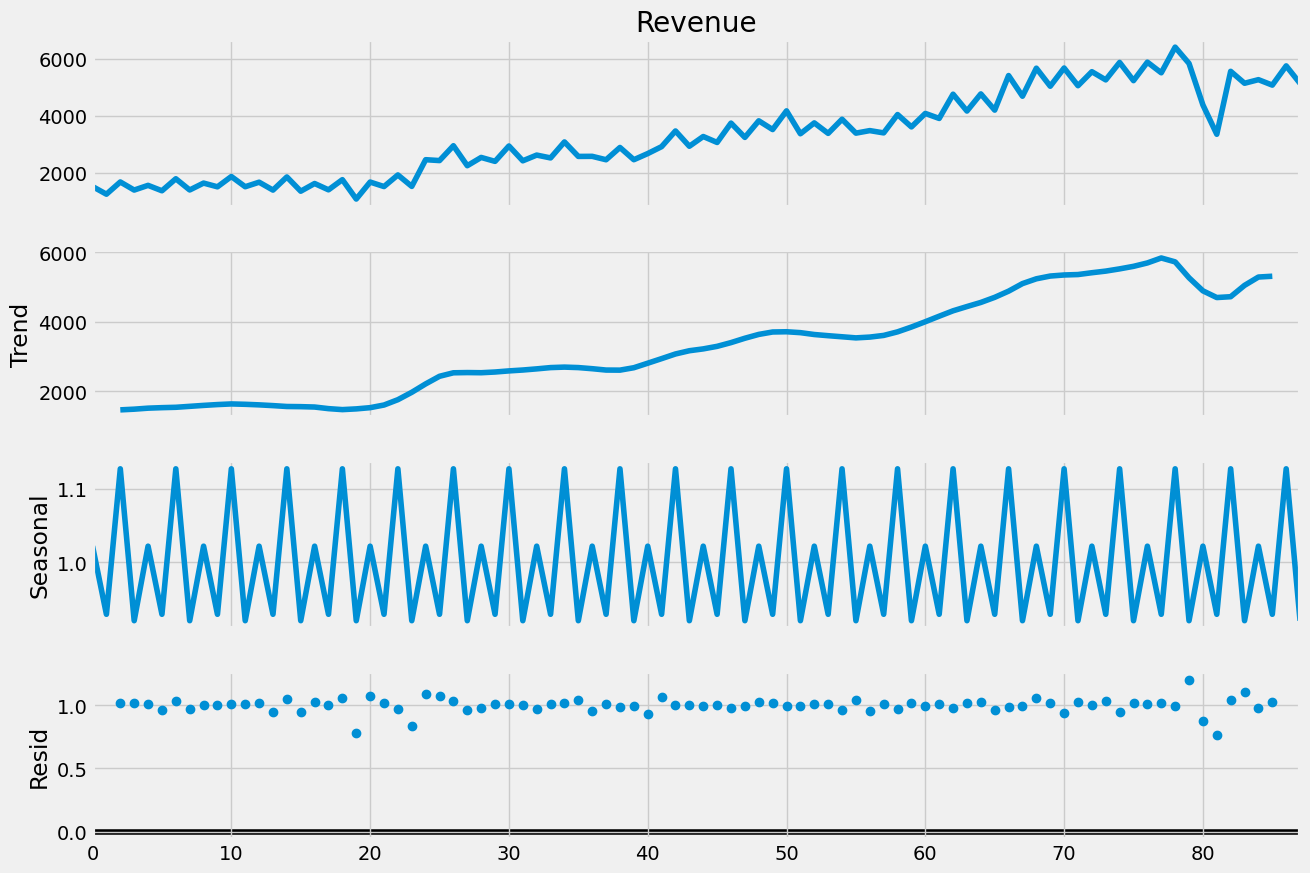

In [11]:
result = seasonal_decompose(df["Revenue"],
                            model='multiplicative', period = 4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

Adidas'ın üç aylık satış gelirini tahmin etmek için Sezonluk ARIMA (SARIMA) modelini kullanacağım. SARIMA modelini kullanmadan önce p, d, ve q değerlerini bulmak gerekir.

Veriler durağan olmadığı için d'nin değeri 1'dir. p ve q değerlerini bulmak için otokorelasyon ve kısmi otokorelasyon grafiklerini kullanabiliriz:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

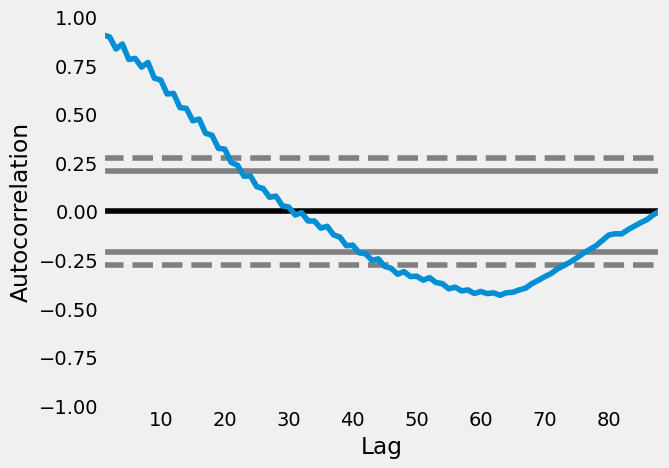

In [13]:
pd.plotting.autocorrelation_plot(df["Revenue"])

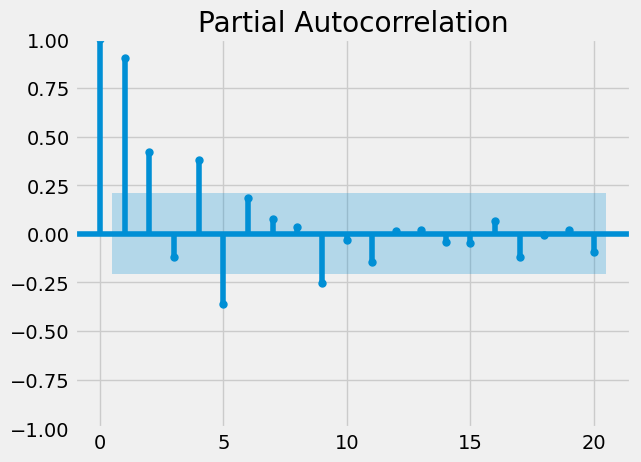

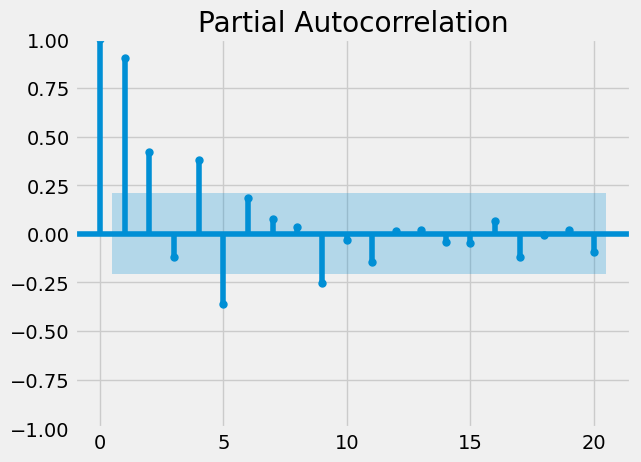

In [14]:
plot_pacf(df["Revenue"], lags = 20)

Şimdi Adidas'ın üç aylık gelirini tahmin etmek için bir SARIMA modelinin nasıl eğitileceği aşağıda açıklanmıştır:

In [16]:
# Example values for p, d, and q (replace with values from your analysis)
p = 1
d = 1
q = 1

model=sm.tsa.statespace.SARIMAX(df['Revenue'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -548.282
Date:                            Sat, 23 Aug 2025   AIC                           1106.564
Time:                                    20:25:09   BIC                           1118.152
Sample:                                         0   HQIC                          1111.191
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7176      0.053     13.636      0.000       0.614       0.821
ma.L1         -0.9981      0.545   

Şimdi önümüzdeki sekiz çeyrek için Adidas'ın üç aylık gelirini tahmin edelim:

In [17]:
predictions = model.predict(len(df), len(df)+7)
print(predictions)

88    5821.163325
89    5422.104855
90    6515.955262
91    5899.908795
92    6275.658176
93    5667.940764
94    6646.274527
95    6105.788062
Name: predicted_mean, dtype: float64


<Axes: >

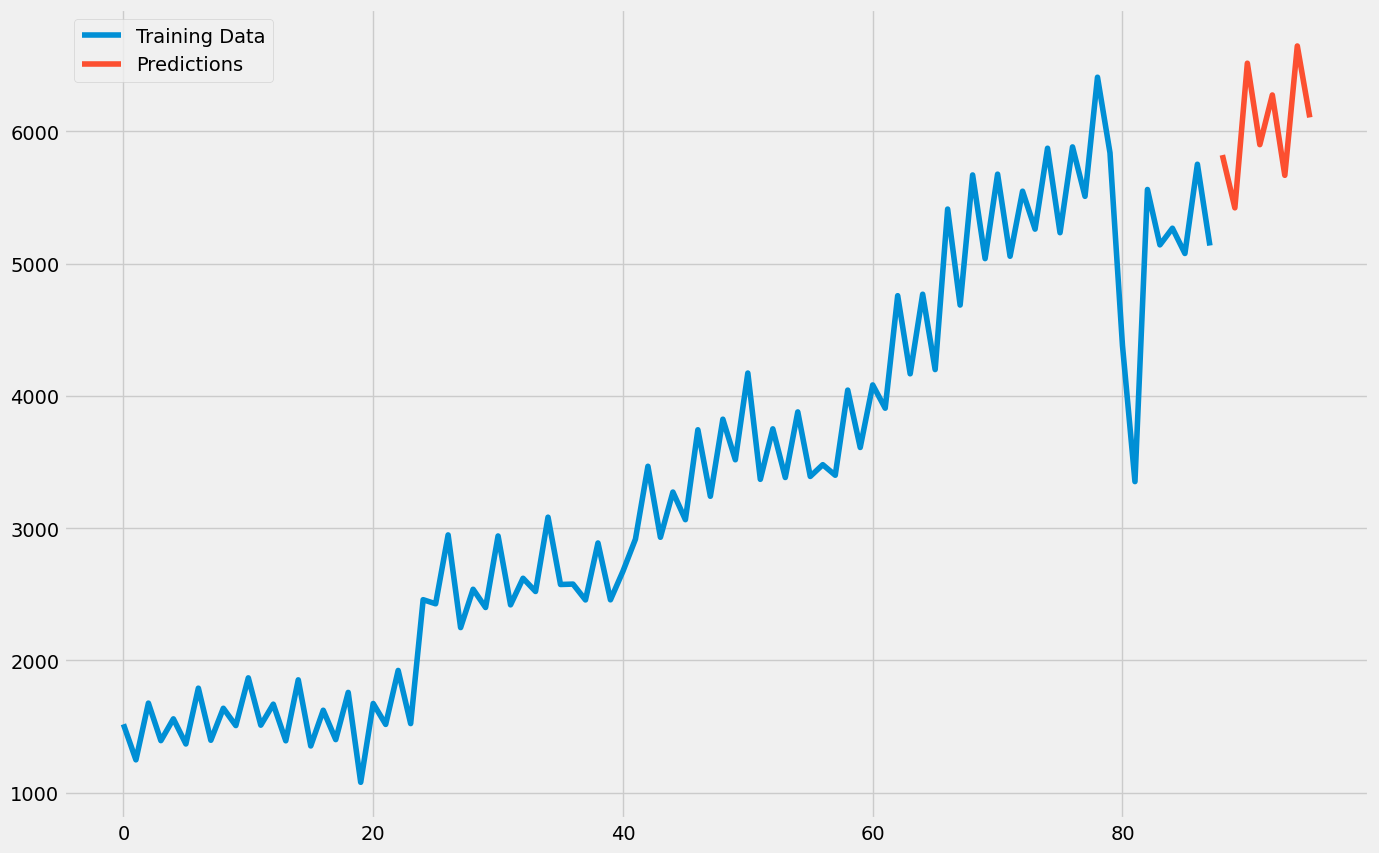

In [18]:
df["Revenue"].plot(legend=True,
                     label="Training Data",
                     figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

**Özet**
Python programlama dilini kullanarak iş tahminini bu şekilde gerçekleştirebilirsiniz. İş Tahmininde, işletme tarafından oluşturulan geçmiş Zaman Serisi verilerini kullanarak gelecekteki satışları, harcamaları veya gelirleri tahmin etmeyi amaçlıyoruz.